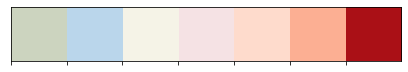

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

colors = ["#CCD4BF","#bad6eb","#F5F3E7", "#F5E2E4",'#fedbcc',"#fcaf93","#aa1016"]
sns.palplot(sns.color_palette(colors))

#EEBAB2
#E7CBA9


In [2]:
#import data
labeled_data = pd.read_csv("TrainingWiDS2021.csv")
dic = pd.read_csv("DataDictionaryWiDS2021.csv")

In [3]:
#IDENTIFIERS

In [4]:
#Overall number of diabetes

In [5]:
# DUPLICATES
labeled_data.duplicated().value_counts()

False    130157
dtype: int64

In [6]:
#filter for labs
pd.set_option('display.max_colwidth', None)
labsdic = dic.loc[dic['Category']=='labs']
display(labsdic)

Category      Variable Name Unit of Measure Data Type  \
97      labs     d1_albumin_max            None   numeric   
98      labs     d1_albumin_min             g/L   numeric   
99      labs   d1_bilirubin_max      micromol/L   numeric   
100     labs   d1_bilirubin_min      micromol/L   numeric   
101     labs         d1_bun_max          mmol/L   numeric   
102     labs         d1_bun_min          mmol/L   numeric   
103     labs     d1_calcium_max          mmol/L   numeric   
104     labs     d1_calcium_min          mmol/L   numeric   
105     labs  d1_creatinine_max      micromol/L   numeric   
106     labs  d1_creatinine_min      micromol/L   numeric   
107     labs     d1_glucose_max          mmol/L   numeric   
108     labs     d1_glucose_min          mmol/L   numeric   
109     labs        d1_hco3_max          mmol/L   numeric   
110     labs        d1_hco3_min            None   numeric   
111     labs  d1_hemaglobin_max            g/dL   numeric   
112     labs  d1_hemaglobin_min            g/dL   numeric   
113     labs  d1_hematocrit_max        Fraction   numeric   
114     labs  d1_hematocrit_min        Fraction   numeric   
115     labs         d1_inr_max      micromol/L   numeric   
116     labs         d1_inr_min      micromol/L   numeric   
117     labs     d1_lactate_max          mmol/L   numeric   
118     labs     d1_lactate_min          mmol/L   numeric   
119     labs   d1_platelets_max          10^9/L   numeric   
120     labs   d1_platelets_min          10^9/L   numeric   
121     labs   d1_potassium_max          mmol/L   numeric   
122     labs   d1_potassium_min          mmol/L   numeric   
123     labs      d1_sodium_max          mmol/L   numeric   
124     labs      d1_sodium_min          mmol/L   numeric   
125     labs         d1_wbc_max          10^9/L   numeric   
126     labs         d1_wbc_min          10^9/L   numeric   
127     labs     h1_albumin_max            None   numeric   
128     labs     h1_albumin_min             g/L   numeric   
129     labs   h1_bilirubin_max      micromol/L   numeric   
130     labs   h1_bilirubin_min      micromol/L   numeric   
131     labs         h1_bun_max          mmol/L   numeric   
132     labs         h1_bun_min          mmol/L   numeric   
133     labs     h1_calcium_max          mmol/L   numeric   
134     labs     h1_calcium_min          mmol/L   numeric   
135     labs  h1_creatinine_max      micromol/L   numeric   
136     labs  h1_creatinine_min      micromol/L   numeric   
137     labs     h1_glucose_max          mmol/L   numeric   
138     labs     h1_glucose_min          mmol/L   numeric   
139     labs        h1_hco3_max          mmol/L   numeric   
140     labs        h1_hco3_min            None   numeric   
141     labs  h1_hemaglobin_max            g/dL   numeric   
142     labs  h1_hemaglobin_min            g/dL   numeric   
143     labs  h1_hematocrit_max        Fraction   numeric   
144     labs  h1_hematocrit_min        Fraction   numeric   
145     labs         h1_inr_max      micromol/L   numeric   
146     labs         h1_inr_min      micromol/L   numeric   
147     labs     h1_lactate_max          mmol/L   numeric   
148     labs     h1_lactate_min          mmol/L   numeric   
149     labs   h1_platelets_max          10^9/L   numeric   
150     labs   h1_platelets_min          10^9/L   numeric   
151     labs   h1_potassium_max          mmol/L   numeric   
152     labs   h1_potassium_min          mmol/L   numeric   
153     labs      h1_sodium_max          mmol/L   numeric   
154     labs      h1_sodium_min          mmol/L   numeric   
155     labs         h1_wbc_max          10^9/L   numeric   
156     labs         h1_wbc_min          10^9/L   numeric   

                                                                                                                                     Description  \
97                                   The lowest albumin concentration of the patient in their serum during the first 24 hours of their

In [7]:
#d : value of x during the first 24 hours of their unit stay
#h : value of x during the first hour of their unit stay

In [8]:
labsvars = labsdic['Variable Name'].to_list()

In [9]:
labsdf=labeled_data[labsvars]

In [10]:
#different variables being tested

from collections import Counter

v=[]
for var in labsvars:
    v.append(var[3:-4])
print(len(Counter(v)))
Counter(v)
listvars=list(Counter(v).keys())
listvars

15


['albumin',
 'bilirubin',
 'bun',
 'calcium',
 'creatinine',
 'glucose',
 'hco3',
 'hemaglobin',
 'hematocrit',
 'inr',
 'lactate',
 'platelets',
 'potassium',
 'sodium',
 'wbc']

In [11]:
d = pd.DataFrame(labsdf.loc[:, labsdf.columns.str.startswith('d1')])

In [12]:
#sanity check to see if there are min values > max for d1 and h1
for f in listvars:
    d['min>max'] = np.where((d[f"d1_{f}_min"] > d[f"d1_{f}_max"]), 
         'PROBLEM', 
         'OK')

In [13]:
d['min>max'].value_counts()

OK    130157
Name: min>max, dtype: int64

In [14]:
h = pd.DataFrame(labsdf.loc[:, labsdf.columns.str.startswith('h1')])

In [15]:
for f in listvars:
    h['min>max'] = np.where((h[f"h1_{f}_min"] > h[f"h1_{f}_max"]), 
         'PROBLEM', 
         'OK')

In [16]:
h['min>max'].value_counts()

OK    130157
Name: min>max, dtype: int64

In [17]:
for f in listvars:
    max_d1 = 'd1_' + f + '_max'
    min_d1 = 'd1_' + f + '_min'
    
    d['d1_' + f + '_dif'] = d[max_d1] - d[min_d1]
    
d_dif=d.iloc[:,30:]

for f in listvars:
    max_h1 = 'h1_' + f + '_max'
    min_h1 = 'h1_' + f + '_min'
    
    h['h1_' + f + '_dif'] = h[max_h1] - h[min_h1]
    
h_dif=h.iloc[:,30:]

#a=d_dif.corr()
#sns.heatmap(a, cmap="Reds")

In [18]:
#NULL VALUES

null=((labsdf.isnull().sum()/len(labsdf)*100).sort_values(ascending=False)).to_frame()
null.rename(columns={0:'%_null'}, inplace=True)
display(null)

%_null
h1_bilirubin_max   92.089553
h1_bilirubin_min   92.089553
h1_albumin_max     91.431886
h1_albumin_min     91.431886
h1_lactate_min     91.018539
h1_lactate_max     91.018539
h1_hco3_min        81.743587
h1_hco3_max        81.743587
h1_wbc_min         81.429351
h1_wbc_max         81.429351
h1_calcium_max     81.379411
h1_calcium_min     81.379411
h1_platelets_min   81.231897
h1_platelets_max   81.231897
h1_bun_min         80.664121
h1_bun_max         80.664121
h1_creatinine_min  80.505851
h1_creatinine_max  80.505851
h1_hematocrit_min  79.101393
h1_hematocrit_max  79.101393
h1_hemaglobin_max  78.973855
h1_hemaglobin_min  78.973855
h1_sodium_max      78.198637
h1_sodium_min      78.198637
h1_potassium_max   77.461066
h1_potassium_min   77.461066
d1_lactate_max     73.375231
d1_lactate_min     73.375231
h1_inr_max         62.396183
h1_inr_min         62.396183
d1_inr_max         62.396183
d1_inr_min         62.396183
d1_bilirubin_max   58.955723
d1_bilirubin_min   58.955723
h1_glucose_max     57.678803
h1_glucose_min     57.678803
d1_albumin_min     54.861437
d1_albumin_max     54.861437
d1_hco3_min        15.402168
d1_hco3_max        15.402168
d1_platelets_max   14.257397
d1_platelets_min   14.257397
d1_wbc_max         13.390751
d1_wbc_min         13.390751
d1_calcium_min     12.824512
d1_calcium_max     12.824512
d1_hemaglobin_min  12.471093
d1_hemaglobin_max  12.471093
d1_hematocrit_max  11.976306
d1_hematocrit_min  11.976306
d1_bun_min         10.551872
d1_bun_max         10.551872
d1_creatinine_min  10.197684
d1_creatinine_max  10.197684
d1_sodium_max      10.195379
d1_sodium_min      10.195379
d1_potassium_min    9.639128
d1_potassium_max    9.639128
d1_glucose_min      6.333121
d1_glucose_max      6.333121

In [19]:
d["d_nancount"] = d.isna().sum(axis=1)
h["h_nancount"] = h.isna().sum(axis=1)
del d['min>max']
del h['min>max']
dh=d.join(h)

In [20]:
len(dh.loc[dh['d_nancount']!=dh['h_nancount']])/len(dh)

0.8214925052052521

In [21]:
len(dh.loc[dh['d_nancount']<dh['h_nancount']])/len(dh)

0.8214925052052521

In [22]:
less50=null.loc[null['%_null']<30]
less50vars = less50.index.to_list()

v2=[]
for var in less50vars:
    v2.append(var[3:-4])
print(len(Counter(v2)))
Counter(v2)
list50vars=list(Counter(v2).keys())
list50vars

11


['hco3',
 'platelets',
 'wbc',
 'calcium',
 'hemaglobin',
 'hematocrit',
 'bun',
 'creatinine',
 'sodium',
 'potassium',
 'glucose']

In [23]:
more50=null.loc[null['%_null']>=30]
more50vars = more50.index.to_list()

v3=[]
for var in more50vars:
    v3.append(var[3:-4])
print(len(Counter(v3)))
Counter(v3)
listm50vars=list(Counter(v3).keys())
listm50vars

15


['bilirubin',
 'albumin',
 'lactate',
 'hco3',
 'wbc',
 'calcium',
 'platelets',
 'bun',
 'creatinine',
 'hematocrit',
 'hemaglobin',
 'sodium',
 'potassium',
 'inr',
 'glucose']

In [130]:
describe = dh.describe()
display(describe)

d1_albumin_max  d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  \
count    58751.000000    58751.000000      53422.000000      53422.000000   
mean         2.952673        2.883073          1.191379          1.117405   
std          0.675606        0.679808          2.319165          2.201525   
min          1.200000        1.100000          0.200000          0.200000   
25%          2.500000        2.400000          0.400000          0.400000   
50%          3.000000        2.900000          0.700000          0.600000   
75%          3.400000        3.400000          1.100000          1.000000   
max          4.600000        4.500000         60.200000         58.000000   

          d1_bun_max     d1_bun_min  d1_calcium_max  d1_calcium_min  \
count  116423.000000  116423.000000   113465.000000   113465.000000   
mean       25.578808      23.554154        8.379782        8.164674   
std        20.495927      18.708332        0.740098        0.793055   
min         4.000000       3.000000        6.200000        5.500000   
25%        13.000000      12.000000        7.900000        7.700000   
50%        19.000000      17.000000        8.400000        8.200000   
75%        31.000000      29.000000        8.800000        8.700000   
max       126.000000     113.090000       10.800000       10.300000   

       d1_creatinine_max  d1_creatinine_min  ...   h1_hco3_dif  \
count      116884.000000      116884.000000  ...  23762.000000   
mean            1.493531           1.363795  ...      0.057967   
std             1.525906           1.341642  ...      0.527626   
min             0.340000           0.300000  ...    -31.000000   
25%             0.750000           0.710000  ...      0.000000   
50%             1.000000           0.940000  ...      0.000000   
75%             1.510000           1.400000  ...      0.000000   
max            11.110000           9.937900  ...     16.000000   

       h1_hemaglobin_dif  h1_hematocrit_dif    h1_inr_dif  h1_lactate_dif  \
count       27367.000000       27201.000000  48944.000000    11690.000000   
mean            0.115961           0.382034      0.114316        0.051216   
std             0.634259           1.710525      0.451545        0.427566   
min           -12.200000         -35.500000      0.000000      -17.619500   
25%             0.000000           0.000000      0.000000        0.000000   
50%             0.000000           0.000000      0.000000        0.000000   
75%             0.000000           0.000000      0.000000        0.000000   
max            12.400000          36.000000      6.756000       11.000000   

       h1_platelets_dif  h1_potassium_dif  h1_sodium_dif    h1_wbc_dif  \
count      24428.000000      29336.000000   28376.000000  24171.000000   
mean           0.819551          0.041956       0.287391      0.051388   
std            6.833655          0.232696       1.116460      0.550737   
min            0.000000         -4.600000       0.000000      0.000000   
25%            0.000000          0.000000       0.000000      0.000000   
50%            0.000000          0.000000       0.000000      0.000000   
75%            0.000000          0.000000       0.000000      0.000000   
max          274.000000          4.700000      43.000000     33.000000   

          h_nancount  
count  130157.000000  
mean       35.859124  
std        13.609862  
min         0.000000  
25%        36.000000  
50%        42.000000  
75%        45.000000  
max        45.000000  

[8 rows x 92 columns]

In [176]:
minmax = dh.loc[:, ~((dh.columns.str.contains('dif')) |(dh.columns.str.contains('count')))]
mmdescribe= minmax.describe()

In [180]:
print(mmdescribe.idxmin(axis=1))
print()
print(mmdescribe.idxmax(axis=1))


count    h1_bilirubin_max
mean     d1_bilirubin_min
std      d1_potassium_min
min      d1_bilirubin_max
25%      d1_bilirubin_max
50%      d1_bilirubin_min
75%      d1_bilirubin_min
max        d1_albumin_min
dtype: object

count      d1_glucose_max
mean     d1_platelets_max
std        h1_glucose_max
min         d1_sodium_max
25%      d1_platelets_max
50%      d1_platelets_max
75%      d1_platelets_max
max        h1_glucose_max
dtype: object


<AxesSubplot:>

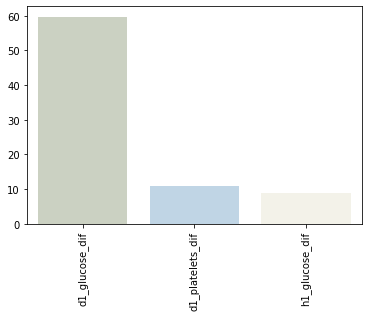

In [135]:
dif=pd.DataFrame(dh.loc[:, dh.columns.str.endswith(('dif'))])
df2 = dif[dif.columns[dif.mean(axis=0) > 5]]
df2mean=df2.mean()

plt.xticks(rotation=90)
sns.barplot(x = df2mean.index , y = df2mean , ci = None, palette=colors)

In [132]:
#Fazer isto com os apaches p ver correlaçoes p poder fazer missing values

#g = sns.PairGrid(dh)
#g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=2.5)


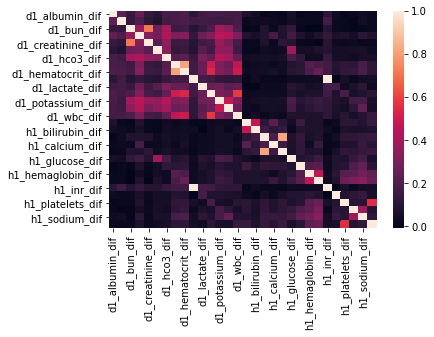

d1_albumin_dif  d1_bilirubin_dif  d1_bun_dif  \
d1_albumin_dif                1.0               NaN         NaN   
d1_bilirubin_dif              NaN               1.0         NaN   
d1_bun_dif                    NaN               NaN    1.000000   
d1_calcium_dif                NaN               NaN         NaN   
d1_creatinine_dif             NaN               NaN    0.714844   
d1_glucose_dif                NaN               NaN         NaN   
d1_hco3_dif                   NaN               NaN         NaN   
d1_hemaglobin_dif             NaN               NaN         NaN   
d1_hematocrit_dif             NaN               NaN         NaN   
d1_inr_dif                    NaN               NaN         NaN   
d1_lactate_dif                NaN               NaN         NaN   
d1_platelets_dif              NaN               NaN         NaN   
d1_potassium_dif              NaN               NaN         NaN   
d1_sodium_dif                 NaN               NaN         NaN   
d1_wbc_dif                    NaN               NaN         NaN   
h1_albumin_dif                NaN               NaN         NaN   
h1_bilirubin_dif              NaN               NaN         NaN   
h1_bun_dif                    NaN               NaN         NaN   
h1_calcium_dif                NaN               NaN         NaN   
h1_creatinine_dif             NaN               NaN         NaN   
h1_glucose_dif                NaN               NaN         NaN   
h1_hco3_dif                   NaN               NaN         NaN   
h1_hemaglobin_dif             NaN               NaN         NaN   
h1_hematocrit_dif             NaN               NaN         NaN   
h1_inr_dif                    NaN               NaN         NaN   
h1_lactate_dif                NaN               NaN         NaN   
h1_platelets_dif              NaN               NaN         NaN   
h1_potassium_dif              NaN               NaN         NaN   
h1_sodium_dif                 NaN               NaN         NaN   
h1_wbc_dif                    NaN               NaN         NaN   

                   d1_calcium_dif  d1_creatinine_dif  d1_glucose_dif  \
d1_albumin_dif                NaN                NaN             NaN   
d1_bilirubin_dif              NaN                NaN             NaN   
d1_bun_dif                    NaN           0.714844             NaN   
d1_calcium_dif                1.0                NaN             NaN   
d1_creatinine_dif             NaN           1.000000             NaN   
d1_glucose_dif                NaN                NaN             1.0   
d1_hco3_dif                   NaN                NaN             NaN   
d1_hemaglobin_dif             NaN                NaN             NaN   
d1_hematocrit_dif             NaN                NaN             NaN   
d1_inr_dif                    NaN                NaN             NaN   
d1_lactate_dif                NaN                NaN             NaN   
d1_platelets_dif              NaN                NaN             NaN   
d1_potassium_dif              NaN                NaN             NaN   
d1_sodium_dif                 NaN                NaN             NaN   
d1_wbc_dif                    NaN                NaN             NaN   
h1_albumin_dif                NaN                NaN             NaN   
h1_bilirubin_dif              NaN                NaN             NaN   
h1_bun_dif                    NaN                NaN             NaN   
h1_calcium_dif                NaN                NaN             NaN   
h1_creatinine_dif             NaN                NaN             NaN   
h1_glucose_dif                NaN                NaN             NaN   
h1_hco3_dif                   NaN                NaN             NaN   
h1_hemaglobin_dif             NaN                NaN             NaN   
h1_hematocrit_dif             NaN                NaN             NaN   
h1_inr_dif                    NaN                NaN             NaN   
h1_lactate_dif                NaN                NaN             NaN 

In [209]:
sns.heatmap(dif.corr())
plt.show()
#to check values:
a=dif.corr()
b=a.where(a>0.5)
pd.set_option('display.max_columns', None)
display(b)


In [210]:
#high correlation between creatine and bun
#high correlation between hematocrit and hemaglobin
